# Example scripts to generate aperture and phase maskswith pyMOE 

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:

from matplotlib import pyplot as plt 
import numpy as np 
import sys
sys.path.insert(0,'..')
import pyMOE as moe
from scipy.constants import micro, nano, milli

## First example: Circular aperture 

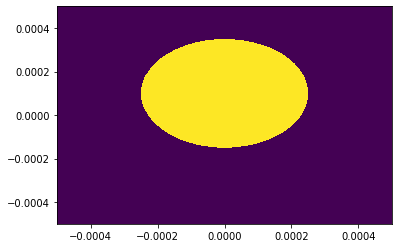

In [26]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)

# Create circular aperture on mask
center=(0*micro, 100*micro)
mask = moe.generate.circular_aperture(mask, radius=250*micro, center=center )


# Accessing data inside mask class
amplitude = mask.aperture

x = mask.x
y = mask.y

XX = mask.XX
YY = mask.YY


plt.figure()
plt.pcolormesh(x,y,amplitude)

# Plotting using internal functions

In [27]:
mask

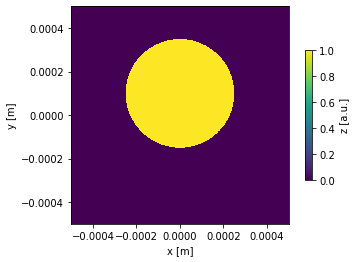

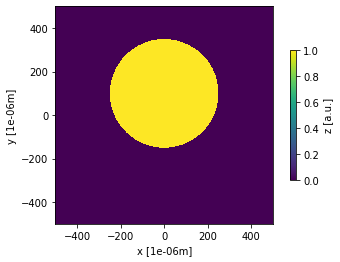

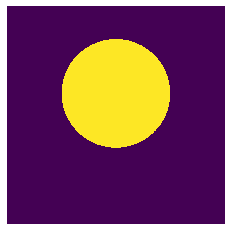

In [28]:

# Plot aperture
moe.plotting.plot_aperture(mask)


moe.plotting.plot_aperture(mask, scale=micro)

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)

In [29]:
type(mask)

pyMOE.aperture.Aperture

# Rectangular Aperture

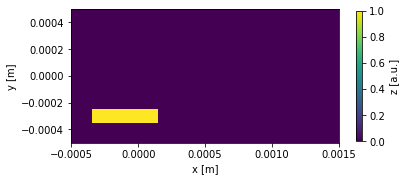

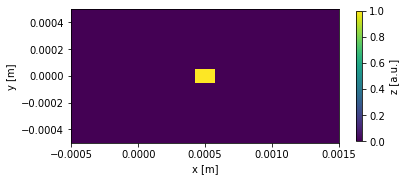

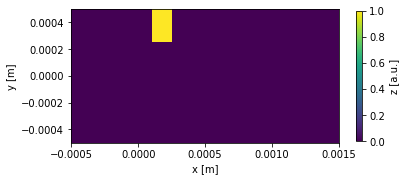

In [30]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)

# create rectangular mask
rectangle = moe.generate.rectangular_aperture(mask, 500*micro, 100*micro, center=(-100*micro, -300*micro))
moe.plotting.plot_aperture(rectangle, )


rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, )
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 500*micro, corner=(100*micro, 250*micro))
moe.plotting.plot_aperture(rectangle, )

## Fresnel Zone Plate

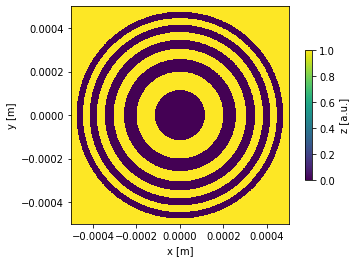

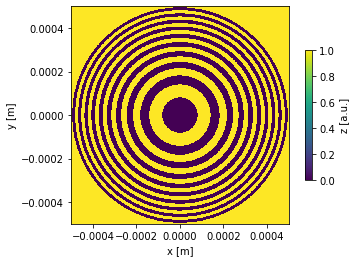

In [31]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )


# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )



# Fresnel phase mask

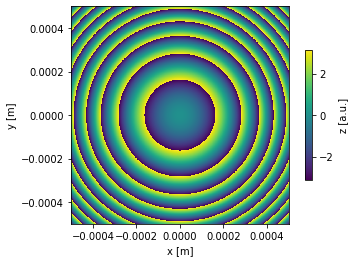

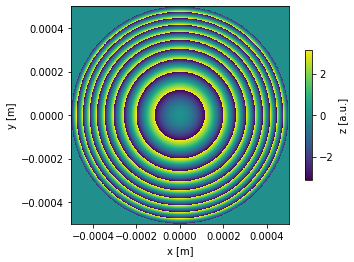

In [32]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, )
moe.plotting.plot_aperture(mask, )

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm

# and truncate around radius
mask = moe.generate.fresnel_phase(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

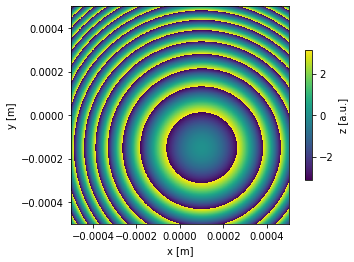

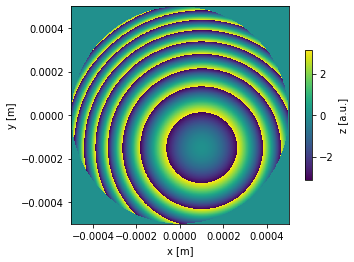

In [33]:
# offcenter fresnel phase mask
aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(100*micro, -150*micro)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.fresnel_lens_phase, center=center, focal_length=50*milli, wavelength=532*nano)

moe.plotting.plot_aperture(aperture)
# Truncate around (0,0)
aperture = moe.generate.truncate_aperture_radius(aperture, 500*micro, center=(0,0))



moe.plotting.plot_aperture(aperture)

## Spiral phase

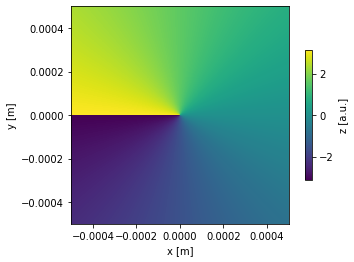

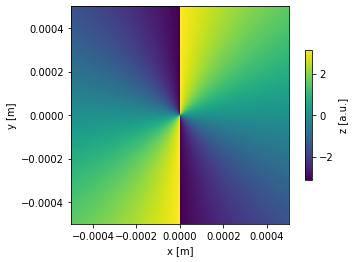

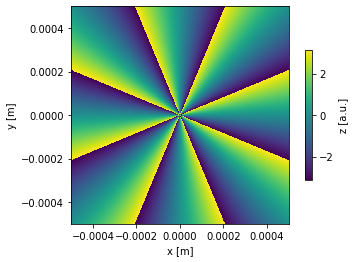

In [34]:



aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=1)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=2)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=8)
moe.plotting.plot_aperture(aperture)

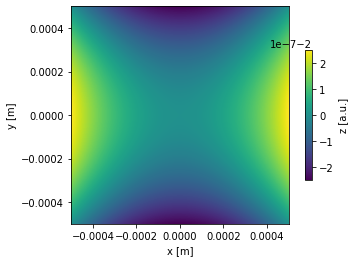

In [35]:
# Saddle function

aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.saddle, center=center, a=1,b=2)
moe.plotting.plot_aperture(aperture)


# Discretize mask to a number of levels

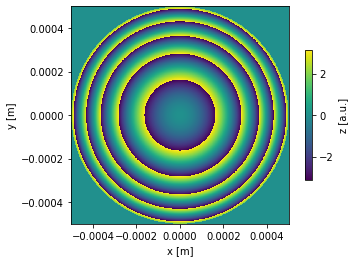

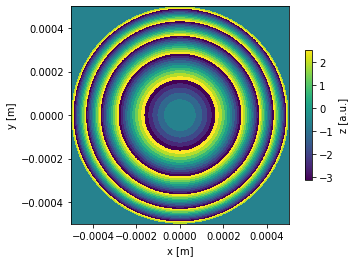

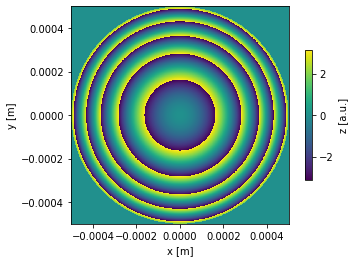

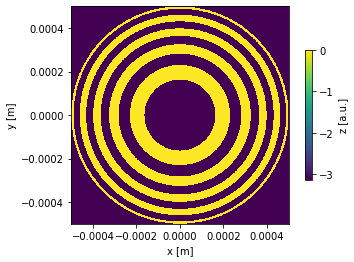

In [36]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

mask.discretize(10)
moe.plotting.plot_aperture(mask)

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

mask.discretize(2)
moe.plotting.plot_aperture(mask)

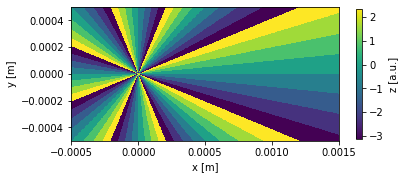

In [37]:
aperture = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=8)

aperture.discretize(8)

moe.plotting.plot_aperture(aperture)



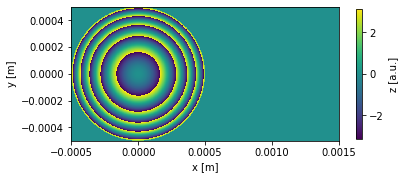

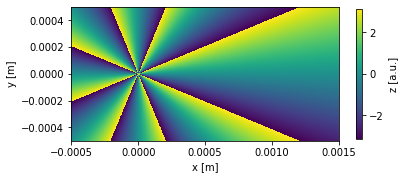

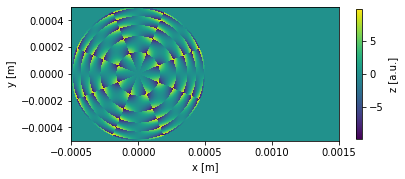

In [69]:
aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1)

aperture2 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture2 =  moe.generate.arbitrary_aperture_function(aperture2, moe.sag.spiral, center=center, L=8)

moe.plotting.plot_aperture(aperture2)

# Operation of both apertures
aperture3 = moe.generate.aperture_operation(aperture1, aperture2, np.multiply)

moe.plotting.plot_aperture(aperture3)

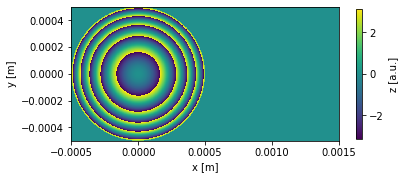

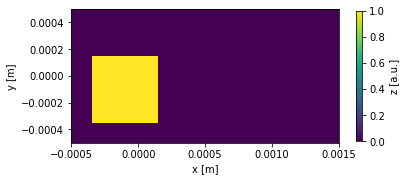

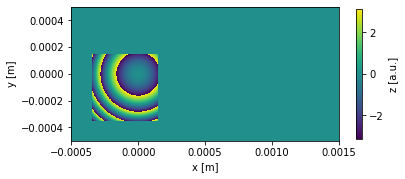

In [73]:
aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1, )

# Create empty mask
rectangle_mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
rectangle_mask = moe.generate.rectangular_aperture(rectangle_mask, 500*micro, 500*micro, center=(-100*micro, -100*micro))
moe.plotting.plot_aperture(rectangle_mask, )


aperture3 = moe.generate.aperture_multiply(aperture1, rectangle_mask)
moe.plotting.plot_aperture(aperture3, )
